In [1]:
import math 
import pandas_datareader as web
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler 
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt 
plt.style.use("fivethirtyeight")

C:\Users\diead\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.
C:\Users\diead\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\diead\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\diead\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' 

In [2]:
IBM = web.DataReader("IBM",data_source='yahoo', start="2012-01-01",end="2021-01-01")

In [3]:
IBM.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,188.710007,186.000000,186.729996,186.300003,5646000.0,134.349426
2012-01-04,186.330002,184.940002,185.570007,185.539993,4346700.0,133.801376
2012-01-05,185.029999,183.100006,184.809998,184.660004,4463100.0,133.166763
2012-01-06,184.479996,182.309998,184.389999,182.539993,4897100.0,131.637955
2012-01-09,182.270004,180.270004,182.199997,181.589996,5201200.0,130.952866


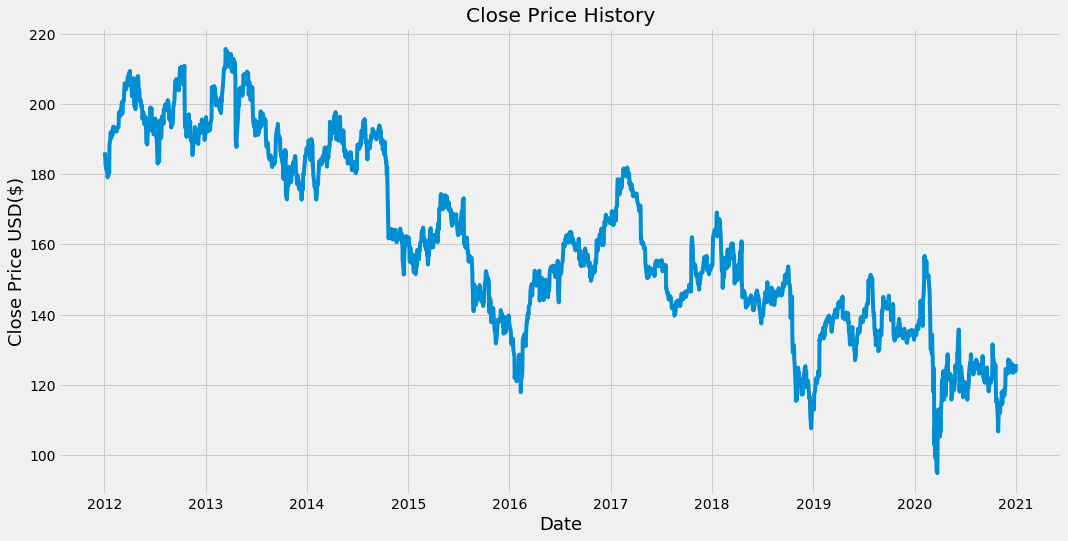

In [4]:
plt.figure(figsize=(16,8))
plt.title("Close Price History")
plt.plot(IBM['Close'])
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price USD($)",fontsize=18)
plt.show()

In [5]:
#Create a new dataframe with 'Close cloumn'

data=IBM.filter(['Close'])

#Convert the dataframe to a numbpy array

dataset=data.values

#Get the number of rows to train the model on 

training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1812

In [6]:
#Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)


scaled_data

array([[0.75625879],
       [0.74997928],
       [0.74270844],
       ...,
       [0.23985793],
       [0.24431957],
       [0.2570437 ]])

In [7]:

#Create the training data set
#Create the scaled training data set

train_data = scaled_data[0:training_data_len, :]

#split the data 

x_train = []
y_train = []

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<=61:
     print(x_train)
     print(y_train)
     print()

[array([0.75625879, 0.74997928, 0.74270844, 0.72519203, 0.71734277,
       0.7150293 , 0.72337442, 0.70874991, 0.69726516, 0.70420556,
       0.7130464 , 0.70850205, 0.77460136, 0.78666441, 0.8027761 ,
       0.80112364, 0.79492683, 0.79063046, 0.80748573, 0.80831202,
       0.80847718, 0.79947118, 0.81690488, 0.81012977, 0.81450883,
       0.81120379, 0.81269109, 0.80682472, 0.80847718, 0.80517227,
       0.80542013, 0.81178222, 0.81508714, 0.81483928, 0.8188052 ,
       0.84970667, 0.85094598, 0.84904566, 0.85276372, 0.84243571,
       0.84904566, 0.85962154, 0.87490706, 0.84681478, 0.85102869,
       0.86788396, 0.87457649, 0.87771625, 0.90068575, 0.90845244,
       0.91902832, 0.9191109 , 0.91671485, 0.90456909, 0.90820458,
       0.91481453, 0.91473183, 0.93365283, 0.92877791, 0.92968678])]
[0.9377840338711563]

[array([0.75625879, 0.74997928, 0.74270844, 0.72519203, 0.71734277,
       0.7150293 , 0.72337442, 0.70874991, 0.69726516, 0.70420556,
       0.7130464 , 0.70850205, 0.774

In [8]:
# Converting x_train and y_train to numpy arrays

x_train,y_train= np.array(x_train), np.array(y_train)

In [9]:

# Reshape the x_train set
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1752, 60, 1)

In [10]:
model = Sequential()
model.add(LSTM(50, return_sequences =True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [11]:

#Compile the model

model.compile(optimizer='adam', loss="mean_squared_error")

In [12]:
# Train the model 

model.fit(x_train, y_train, batch_size=1, epochs=1)


Epoch 1/1
1752/1752 [==============================] - 102s 58ms/step - loss: 0.0022


In [13]:

# Creating the testing data set

# Creating a new array containing scaled values from index 1617 - 2096

test_data = scaled_data[training_data_len - 60: , :]

x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [14]:
#Convert the data to a numpy array
x_test =np.array(x_test)

In [15]:
#Reshape x_test
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(453, 60, 1)

In [16]:

# Get the models predicted price values 

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [17]:
# Get the root mean squared error (RMSE)
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))

rmse

3.7501336027865353

C:\Users\diead\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


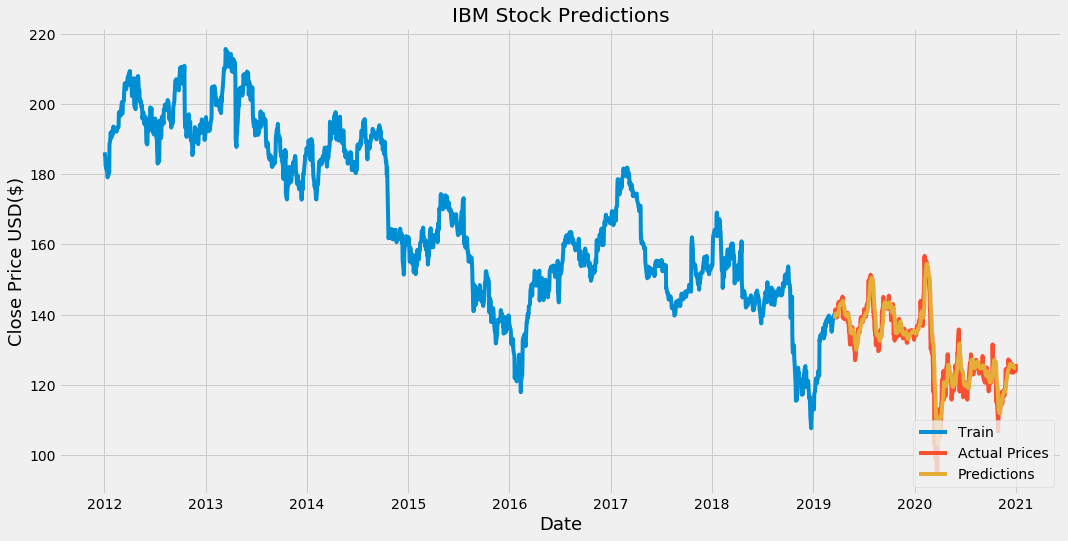

In [18]:

# Plotting the data

train = data[:training_data_len]
valid =data[training_data_len:]
valid['Predictions'] = predictions

#Visualize the data

plt.figure(figsize =(16,8))
plt.title('IBM Stock Predictions')
plt.xlabel("Date",fontsize=18)
plt.ylabel("Close Price USD($)", fontsize=18)

plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train','Actual Prices','Predictions'],loc='lower right')
plt.show()